In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps
from matplotlib import colors
import matplotlib.path as mpath

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num

from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [3]:
# read grid file for lon/lat coordinates
dg = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc")
lat_rho= dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
lat_u= dg.variables["lat_u"]
lon_u = dg.variables["lon_u"]
lat_v= dg.variables["lat_v"]
lon_v = dg.variables["lon_v"]
cor = dg.variables["f"]
pm = dg.variables["pm"]
pn = dg.variables["pn"]
zice = dg.variables["zice"]
h_orig = dg.variables["h"]
dg.close()

# print('Print lon/lat_rho shapes',lon_rho.shape, lat_rho.shape)
# print('Print lon/lat_rho shapes',lon_rho[0:-1,0:-1].shape, lat_rho[0:-1,0:-1].shape)

In [4]:
dg = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_10km-bathy_grd.nc")
h_10km_bathy = dg.variables["h"]
dg.close()

In [5]:
fig_path='/users/boeiradi/COLD_project/postprocessing/figs/Maps_validations/'

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

# define sections to investigate Ross-Filchner and Ross IS dynamics:
xi_pt = [850, 1000, 1275, 1550]
##xi_pt = [875, 1000, 1275, 1550] # new sections, too far east
eta_sec_ini = [1600, 1650,  750,  500]
eta_sec_end = [1945, 1970, 1075, 1196]

In [6]:
# call cartopy projection
proj = ccrs.SouthPolarStereo()

# ========== subregions plots:
# for 2000m isoline
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(300,500,1)
ylimit = np.arange(100,300,1)

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


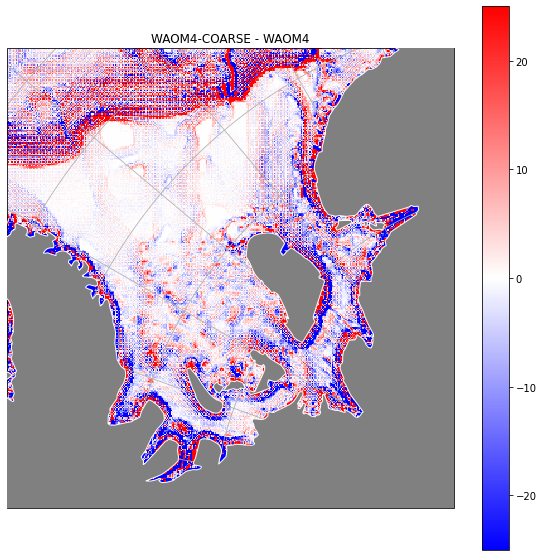

In [7]:

fig = plt.figure(figsize=(10,10))

ax3 = fig.add_subplot(111, projection=proj)
ct2=plt.pcolormesh(lon_rho,lat_rho,h_10km_bathy - h_orig, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=-25, vmax=25)
# plt.title('Bottom salinity \n WAOM10')
plt.title('WAOM4-COARSE - WAOM4')
ax3.gridlines()
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
plt.colorbar(ct2)

name_fig="waom4extend_shflim_S_0.25Q_topo_diff_RFIS.png"
plt.savefig(fig_path + name_fig, dpi=300)
# plt.close()
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


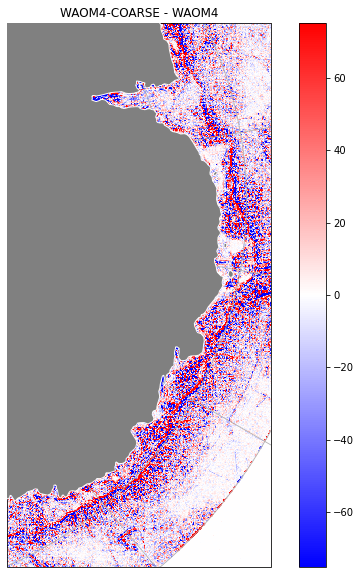

In [12]:

fig = plt.figure(figsize=(10,10))

ax3 = fig.add_subplot(111, projection=proj)
ct2=plt.pcolormesh(lon_rho,lat_rho,h_10km_bathy - h_orig, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=-75, vmax=75)
# plt.title('Bottom salinity \n WAOM10')
plt.title('WAOM4-COARSE - WAOM4')
ax3.gridlines()
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
plt.colorbar(ct2)

name_fig="waom4extend_shflim_S_0.25Q_topo_diff_EAnt.png"
plt.savefig(fig_path + name_fig, dpi=300)
# plt.close()
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


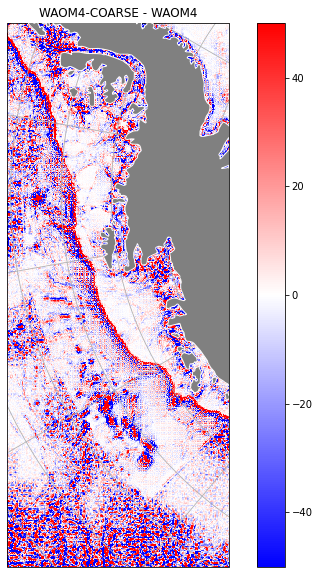

In [11]:

fig = plt.figure(figsize=(10,10))

ax3 = fig.add_subplot(111, projection=proj)
ct2=plt.pcolormesh(lon_rho,lat_rho,h_10km_bathy - h_orig, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=-50, vmax=50)
# plt.title('Bottom salinity \n WAOM10')
plt.title('WAOM4-COARSE - WAOM4')
ax3.gridlines()
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
plt.colorbar(ct2)

name_fig="waom4extend_shflim_S_0.25Q_topo_diff_WAnt.png"
plt.savefig(fig_path + name_fig, dpi=300)
# plt.close()
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


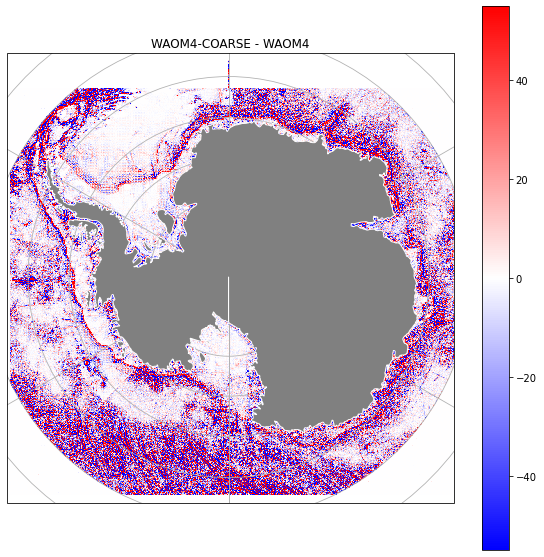

In [11]:

fig = plt.figure(figsize=(10,10))

ax3 = fig.add_subplot(111, projection=proj)
ct2=plt.pcolormesh(lon_rho,lat_rho,h_10km_bathy - h_orig, transform=ccrs.PlateCarree(), cmap=plt.cm.bwr, vmin=-55, vmax=55)
# plt.title('Bottom salinity \n WAOM10')
plt.title('WAOM4-COARSE - WAOM4')
ax3.gridlines()
ax3.set_extent([-180, 180, -90, -62], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
plt.colorbar(ct2)

name_fig="waom4extend_shflim_S_0.25Q_topo_diff.png"
plt.savefig(fig_path + name_fig, dpi=300)
# plt.close()
plt.show()


In [7]:
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(300,500,1)
ylimit = np.arange(100,300,1)


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axe

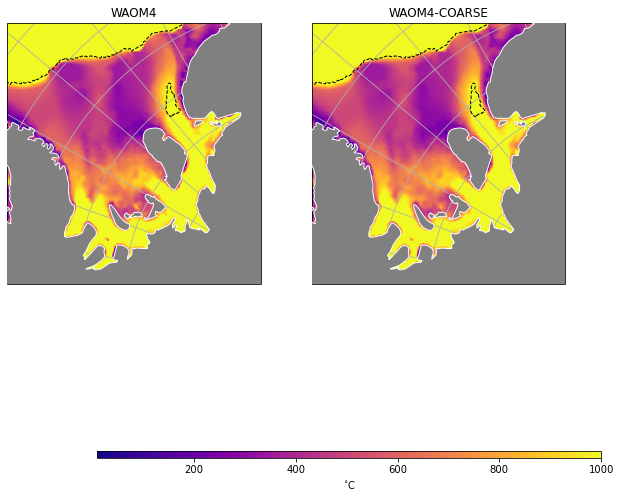

In [8]:
tmin = 10
tmax = 1000

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121, projection=proj)
ct1=plt.pcolormesh(lon_rho,lat_rho,h_orig, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('WAOM4')
ax1.gridlines() 
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],zice[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h_orig[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

ax2 = fig.add_subplot(122, projection=proj)
ct1=plt.pcolormesh(lon_rho,lat_rho,h_10km_bathy, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('WAOM4-COARSE')
ax2.gridlines()
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax2.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],zice[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h_10km_bathy[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

cbar_ax1 = fig.add_axes([0.25, 0.08, 0.7, 0.01])
fig.colorbar(ct1, cax=cbar_ax1, orientation='horizontal')
cbar_ax1.set_xlabel('$^{\circ}$C')#, labelpad=-35)

plt.show()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axe

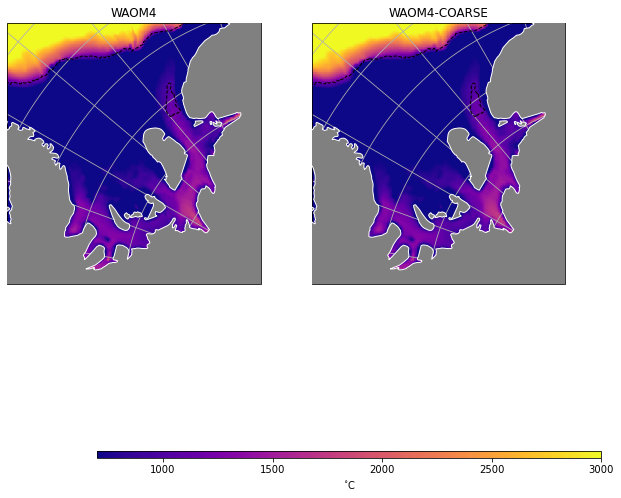

In [9]:
tmin = 700
tmax = 3000

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121, projection=proj)
ct1=plt.pcolormesh(lon_rho,lat_rho,h_orig, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('WAOM4')
ax1.gridlines() 
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],zice[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h_orig[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

ax2 = fig.add_subplot(122, projection=proj)
ct1=plt.pcolormesh(lon_rho,lat_rho,h_10km_bathy, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('WAOM4-COARSE')
ax2.gridlines()
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax2.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],zice[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h_10km_bathy[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

cbar_ax1 = fig.add_axes([0.25, 0.08, 0.7, 0.01])
fig.colorbar(ct1, cax=cbar_ax1, orientation='horizontal')
cbar_ax1.set_xlabel('$^{\circ}$C')#, labelpad=-35)

plt.show()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


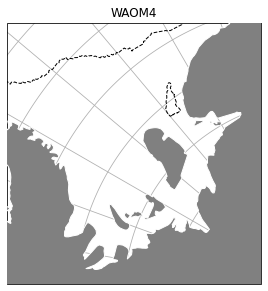

In [49]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121, projection=proj)
# ct1=plt.pcolormesh(lon_rho,lat_rho,h_orig, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
plt.title('WAOM4')
ax1.gridlines()
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],zice[xlimit,ylimit],levels=[-.1],linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(lon_rho[xlimit,ylimit], lat_rho[xlimit,ylimit],h_orig[xlimit,ylimit],levels=(200,400,600,800,1000), transform=ccrs.PlateCarree(), colors='grey')

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121, projection=proj)
clon = plt.pcolormesh(lon_rho,lat_rho,lon_rho, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma)
plt.title('Long')
ax1.gridlines()
# ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax1.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.colorbar(clon)

ax2 = fig.add_subplot(122, projection=proj)
clat = plt.pcolormesh(lon_rho,lat_rho,lat_rho, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma)
plt.title('Long')
ax2.gridlines()
# ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, edgecolor='white', facecolor='gray')
ax2.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
plt.colorbar(clat)

plt.show()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
